In [1]:
import networkx as nx
from networkx.generators.random_graphs import _random_subset
import sympy as sp
from sympy import symbols 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify


import copy
import time
import random as rd

In [2]:
G = nx.read_adjlist("ER.adjlist")

In [3]:
N = len(G.nodes)

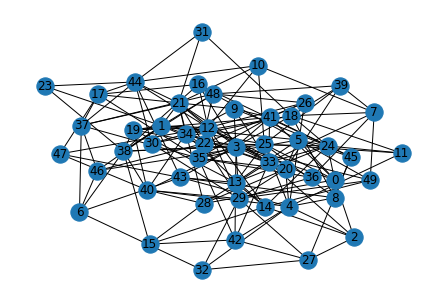

In [4]:
nx.draw(G, with_labels=True)    
plt.show()

In [5]:
adjacency = list(G.adjacency())

In [6]:
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)]

for a, b in adjacency :
    a = int(a)
    for c in b :
        c = int(c)
        A[a][c] = 1

In [7]:
index = []
for i in range(N):
    for j in range(i+1, N):
        if A[i][j] == 1:
            index += [(i,j)]

removed_link = index[rd.randint(0, len(index)-1)]
links = len(index) - 1

In [8]:
print("It was removed the link between node", removed_link[0], "and node", removed_link[1])

It was removed the link between node 1 and node 48


In [9]:
A[removed_link[0]][removed_link[1]] = 0
A[removed_link[1]][removed_link[0]] = 0

In [10]:
W = symbols(f'w:{links}')
print("There are", links, "indipendent weights")

There are 173 indipendent weights


In [11]:
count = 0
P = copy.deepcopy(A)
for i in range(N):
    for j in range(i+1, N):
        if P[i][j] == 1:
            P[i][j] = W[count]
            P[j][i] = W[count]
            count += 1

In [12]:
with open("ER-pS.txt", "r") as file:
    pS = file.read()
    pS = pS.split("\n")
pS = [float(i) for i in pS]
pS = np.round(pS, 5)

In [13]:
e = (np.dot(pS, P) - pS)**2
E = e[0]
for i in range(1, len(e)):
    E += e[i]

In [14]:
t0 = time.time()

def my_func_v(x):
    my_func = lambdify(W, E)
    return my_func(*tuple(x))

# def cons1(x, i):
#     C = (sum(P[i])-1)**2
#     func = lambdify(W, C)
#     return func(*tuple(x))

# cons = ([{'type' : 'eq', 'fun': lambda x: cons1(x, i)} for i in range(len(P))])

x0 = [1]*links
# solution = minimize(my_func_v, x0, bounds = [[0, np.inf]]*len(x0), constraints=cons).x
solution = minimize(my_func_v, x0, bounds = [[0, np.inf]]*len(x0), tol = 1e-7).x

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 5 minutes and 14.271184206008911 seconds


In [15]:
count = 0
P_new = copy.deepcopy(A)
for i in range(N):
    for j in range(i+1, N):
        if P_new[i][j] == 1:
            P_new[i][j] = solution[count]
            P_new[j][i] = solution[count]
            count += 1

In [16]:
P_new

[[0,
  0,
  0.16120607483606372,
  0.09008106828994472,
  0,
  0.11189707281907647,
  0,
  0,
  0.14755143810050958,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0718792337575272,
  0.10406805709719111,
  0,
  0,
  0.19268518109160188,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.1832103272533369,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0.15413339773432083,
  0,
  0,
  0,
  0,
  0,
  0,
  0.19615294915717438,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0246128442388831,
  0,
  0.1250204002183836,
  0.08805007476850538,
  0,
  0,
  0.1446897981175501,
  0,
  0,
  0,
  0,
  0.07508527679921309,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.18464832420345836,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.047311984765991535,
  0,
  0,
  0],
 [0.16120607483606372,
  0,
  0,
  0,
  0.10974049947684657,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.19929445296091075,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.243

In [17]:
matrixP = np.array(P_new)

In [18]:
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

In [19]:
for i in range(N):
    if np.round(autovaloriP[i], 4) == 1:
        pS_new = autovettoriP[i]
        print("Eigenvector found")
        break
np.round(autovaloriP.real, 4)

Eigenvector found


array([ 1.000e+00, -7.010e-01,  6.772e-01, -6.499e-01,  6.039e-01,
        5.865e-01, -6.033e-01, -5.822e-01, -5.587e-01,  5.362e-01,
        5.098e-01,  4.957e-01, -5.290e-01, -5.137e-01, -4.816e-01,
       -4.540e-01,  4.502e-01, -4.094e-01,  4.141e-01,  4.056e-01,
        3.667e-01, -3.703e-01, -3.348e-01, -3.155e-01,  3.153e-01,
        2.973e-01,  2.796e-01, -2.889e-01, -2.609e-01, -2.572e-01,
        2.472e-01,  2.346e-01,  1.993e-01,  1.874e-01, -2.054e-01,
       -1.857e-01,  1.381e-01,  1.201e-01, -1.532e-01, -1.388e-01,
       -1.039e-01, -1.010e-01,  9.060e-02,  6.710e-02,  5.900e-02,
       -6.220e-02,  1.220e-02,  8.000e-04, -6.000e-03, -2.790e-02])

In [20]:
if pS_new[0] < 0:
    pS_new = -pS_new

In [21]:
pS_new = pS_new.real

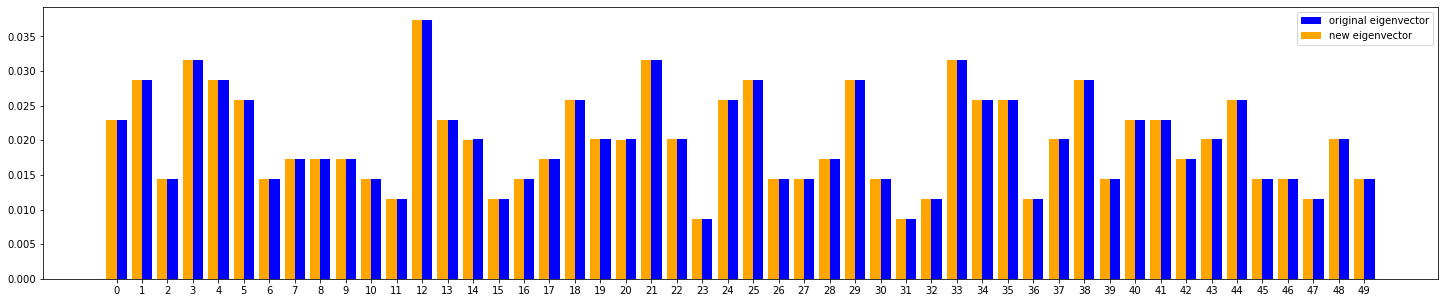

In [22]:
fig, ax = plt.subplots(figsize=(0.5*N, 5))

pSNorm = [h/sum(pS) for h in pS]
pSNorm_new = [abs(h)/sum(abs(pS_new)) for h in pS_new]
nodes = sorted([int(n) for n in G.nodes])

ax.bar(nodes, pSNorm, width=0.4, align='edge', color='blue', label="original eigenvector")
ax.bar(nodes, pSNorm_new, width=-0.4, align='edge', color='orange', label="new eigenvector")

ax.set_xticks(np.arange(0, N, 1))
ax.legend()
plt.show()

In [23]:
for i in range(len(P_new)):
    print(sum(P_new[i]))

1.0625784532452516
1.0397050500034803
0.7137047423091087
1.1743032230971804
1.4425883994667161
1.1500845425724515
0.8962839006120202
1.1346677131301894
0.7753758790057436
0.7317825363381991
0.6250572101633197
0.42668610704549303
1.2886968729251813
1.019192983801846
1.0666838707197381
0.6376755958121283
0.7392928167204074
1.0082120444013198
1.4698969168676923
0.8502252331658902
0.8786301176237298
1.0720392166653139
0.9614121993462272
0.32604250768376464
1.1428254002883496
1.1861138838771361
0.6457923034577778
0.9800682944623895
0.86070782904977
1.2733955078199766
0.5338254884826692
0.3334104427816814
0.6874776137341424
1.0483781443596458
1.0974326970084014
1.2144590000266113
0.5252860059477837
1.0130478752187906
1.2032283450776238
0.6973703016110601
1.0085477458127066
1.0944633692948464
0.8813517501097788
0.9898171735227194
1.3426205340146407
0.8487606055623952
0.7464749538721973
0.5830077874448649
0.965695605037529
0.6672600509669865


In [24]:
walker_per_node = 200

In [25]:
seed = np.random.RandomState()
def dynamic_evolution(G, P_new, history = []):
    evolution = [0] * N
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neightbours = []
            n = int(n)
            for ind in range(len(P_new[n])):
                if P_new[n][ind] != 0:
                    if len(neightbours) != 0:
                        neightbours += [[ind, P_new[n][ind] + neightbours[-1][1]]]
                    else:
                        neightbours += [[ind, P_new[n][ind]]]
            s = sum(P_new[n])
            prob = rd.uniform(0., s)

            for neigh, p in neightbours:
                if prob <= p:
                    evolution[neigh] += 1
                    break
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[int(n)]
    history += [evolution]

In [26]:
history = [[], [], []]
for h in range(len(history)):
    history[h] = [[walker_per_node] * len(G.nodes)]

In [27]:
time_steps = int(1e2)

In [28]:
t0 = time.time()

for h in range(len(history)):
    h = int(h)
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
#         t1 = time.time()
        dynamic_evolution(G, P_new, history[h])
#         print(f"done in {int((time.time()-t1)/60)} minutes and {((time.time()-t1)%60)} seconds")

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 52.19683885574341 seconds


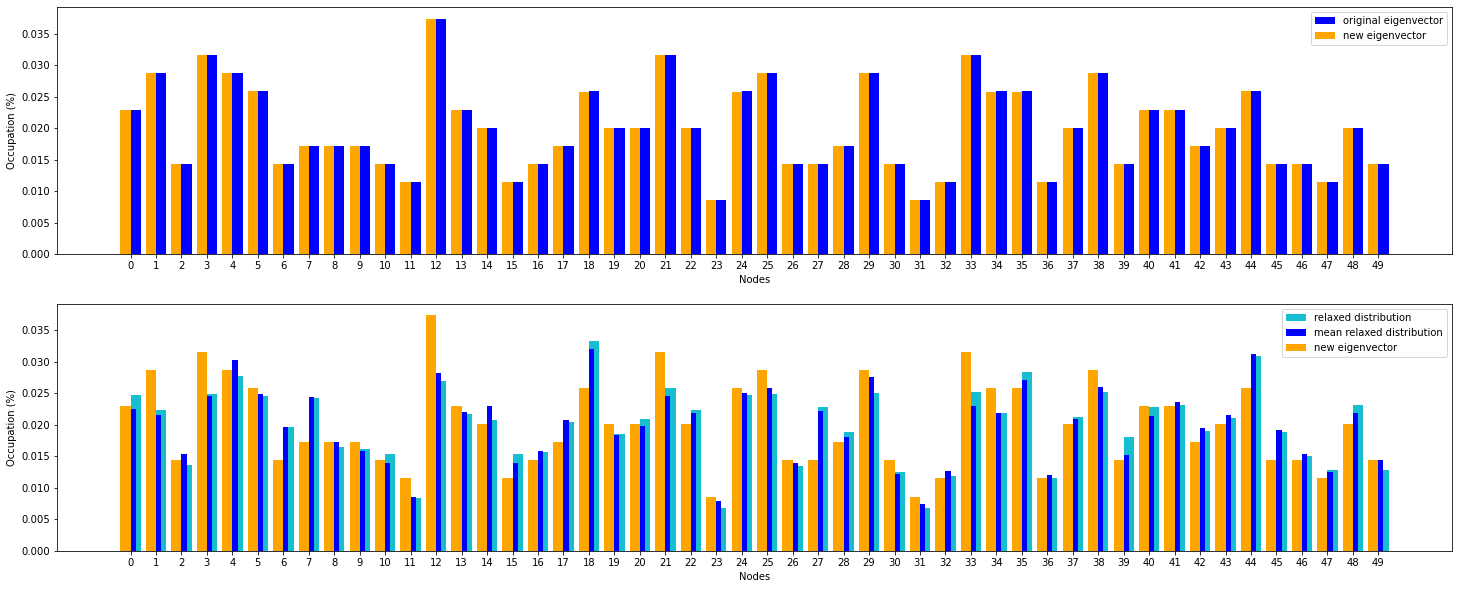

In [29]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(0.5*N, 10))

pSNorm = [h/sum(pS) for h in pS]
pSNorm_new = [h/sum(abs(pS_new)) for h in pS_new]
nodes = sorted([int(n) for n in G.nodes])

ax[0].bar(nodes, pSNorm, width=0.4, align='edge', color='blue', label="original eigenvector")
ax[0].bar(nodes, pSNorm_new, width=-0.4, align='edge', color='orange', label="new eigenvector")

hMean = [[(h1+h2+h3)/walker_per_node/N/3 
          for h1, h2, h3 in zip(history[0][i], history[1][i], history[2][i])] 
         for i in range(len(history[0]))]

ax[1].bar(nodes, [h/sum(history[0][-1]) for h in history[0][-1]], width=0.4, 
          align='edge', color='tab:cyan', label='relaxed distribution')
ax[1].bar(nodes, hMean[-1], width=0.2, align='edge', color='blue', label='mean relaxed distribution')
ax[1].bar(nodes, pSNorm_new, width=-0.4, align='edge', color='orange', label="new eigenvector")

for i in [0,1]:
    ax[i].legend()
    ax[i].set_xlabel("Nodes")
    ax[i].set_ylabel("Occupation (%)")
    ax[i].set_xticks(np.arange(0, N, 1))
#     ax[i].grid(True)


plt.show()